In [1]:
import json, yaml, requests
from datetime import datetime
from dateutil import tz
import pandas as pd
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import seaborn

CONFIG_PATH = "../config/config.yaml"

In [2]:
with open('../newest_ts', 'r') as f:
    newest_ts = f.read()

data_path = f"../data/data_{newest_ts}.json"
with open(data_path, 'r') as f:
    data = json.load(f)

with open(CONFIG_PATH, "r") as stream:
    config = yaml.safe_load(stream)

TIME_ZONE = config['time_zone']
DATETIME_FORMAT = config['dt_format']

In [3]:
def ts2dt(ts, format=DATETIME_FORMAT):
    dt = (datetime.utcfromtimestamp(int(ts))
                    .replace(tzinfo=tz.tzutc())
                    # .astimezone(tz.tzlocal())
                    .astimezone(tz.gettz(TIME_ZONE)))
    return dt.strftime(format), dt

_, newest_dt = ts2dt(newest_ts)
print(f"Recent query happens at {newest_dt.strftime(DATETIME_FORMAT)} ({newest_dt.tzname()}).")

Recent query happens at 2021-10-09 14:13:15 (CST).


In [4]:
def degrees_to_cardinal(d):
  dirs = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
  ix = int(round(d / (360. / len(dirs))))
  return dirs[ix % len(dirs)]

In [5]:
# data.keys()

In [6]:
# data['current']

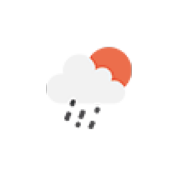

Today, sun rises at 06:16 and sets at 18:03.
Currently, the weather is Rain (light rain).
The temperature is 26.34°C and it feels like 26.34°C.
The UV index is 0.52, humidity is 95%.
The pressure is 1003 hPa, percentage of cloud cover is 100%
The wind comes from ENE direction with a speed 1.34 m/s.


In [7]:
current = data['current']

fig, ax = plt.subplots(figsize=(3, 3))
icon = requests.get(f"http://openweathermap.org/img/wn/{current['weather'][0]['icon']}@2x.png")
im = Image.open(BytesIO(icon.content))
plt.imshow(im)
ax.set_axis_off()
plt.show()

print(f"Today, sun rises at {ts2dt(current['sunrise'], '%H:%M')[0]} \
and sets at {ts2dt(current['sunset'], '%H:%M')[0]}.\n\
Currently, the weather is {current['weather'][0]['main']} ({current['weather'][0]['description']}).\n\
The temperature is {current['temp']}°C and it feels like {current['feels_like']}°C.\n\
The UV index is {current['uvi']}, humidity is {current['humidity']}%.\n\
The pressure is {current['pressure']} hPa, percentage of cloud cover is {current['clouds']}%\n\
The wind comes from {degrees_to_cardinal(current['wind_deg'])} direction with a speed {current['wind_speed']} m/s.")

In [8]:
df_hourly = pd.DataFrame(data['hourly'])
df_daily = pd.DataFrame(data['daily'])

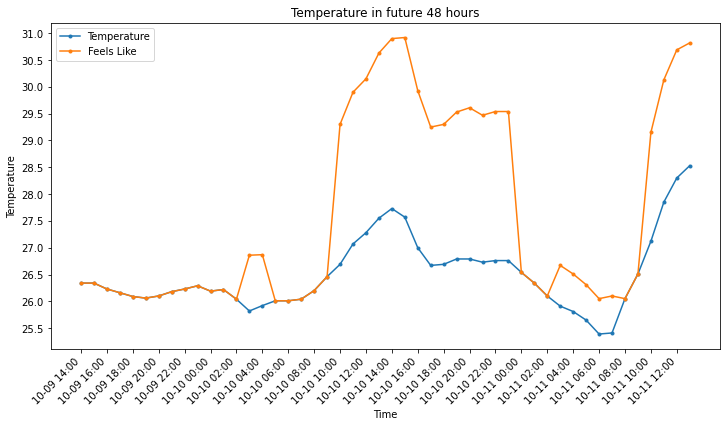

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(df_hourly.temp, '.-', label='Temperature')
plt.plot(df_hourly.feels_like, '.-', label='Feels Like')
ax.set(title='Temperature in future 48 hours', xlabel='Time', ylabel='Temperature')
ax.set_xticks(list(range(0, len(df_hourly), 2)))
ax.set_xticklabels([ts2dt(ts, '%m-%d %H:%M')[0] for i, ts in enumerate(df_hourly.dt) if i%2==0], 
                   rotation=45, ha="right")
ax.locator_params(nbins=15, axis='y')
plt.legend()
plt.show()

In [10]:
df_hourly.head()

,dt,temp,feels_like,pressure,humidity,dew_point,uvi,clouds,visibility,wind_speed,wind_deg,wind_gust,weather,pop,rain
0,1633759200,26.34,26.34,1003,95,25.47,0.52,100,6121,13.77,100,19.66,"[{'id': 501, 'main': 'Rain', 'description': 'm...",1.00,{'1h': 1.72}
1,1633762800,26.34,26.34,1003,94,25.30,0.26,100,6347,14.23,97,20.34,"[{'id': 501, 'main': 'Rain', 'description': 'm...",0.99,{'1h': 2.37}
2,1633766400,26.23,26.23,1003,93,25.01,0.12,100,4038,13.70,94,20.12,"[{'id': 500, 'main': 'Rain', 'description': 'l...",1.00,{'1h': 0.32}
3,1633770000,26.16,26.16,1004,93,24.94,0.03,100,3618,13.29,95,19.41,"[{'id': 502, 'main': 'Rain', 'description': 'h...",1.00,{'1h': 4.65}
4,1633773600,26.09,26.09,1005,93,24.87,0.00,100,4543,13.22,94,19.05,"[{'id': 502, 'main': 'Rain', 'description': 'h...",1.00,{'1h': 4.37}
